<a href="https://colab.research.google.com/github/santiagoruizs/IML_Proyecto_Final/blob/master/IML_Proyecto_Final/colabs/Bosch_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga del Dataset

**Archivos usados:**

* train_numeric.csv

* train_categorical.csv

* train_date.csv

**Tamaño de cada archivo**: 2 Gb

**Estategia**: Cargar cada archivo en el drive, abrir en colab, extraer y guardar las primeras 100.000 filas en otro .csv y borrar el archivo original para liberar espacio

**Codigo de planta**: Line_Station_Feature Number

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Reducción del dataset Numérico

drive.mount('/content/gdrive')
train_numeric = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/train_numeric.csv', header=0, nrows=100000)

train_numeric.to_csv('bosch_numeric.csv')
!cp bosch_numeric.csv "/content/gdrive/My Drive/Dataset Bosch/"

In [ ]:
# Reducción del dataset Categórico

drive.mount('/content/gdrive')
train_category = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/train_categorical.csv', header=0, nrows=100000)

train_category.to_csv('bosch_category.csv')
!cp bosch_category.csv "/content/gdrive/My Drive/Dataset Bosch/"

In [ ]:
# Reducción del dataset Temporal

drive.mount('/content/gdrive')
train_date = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/train_date.csv', header=0, nrows=100000)

train_date.to_csv('bosch_date.csv')
!cp bosch_date.csv "/content/gdrive/My Drive/Dataset Bosch/"

## Dataset Numérico

In [ ]:
drive.mount('/content/gdrive')

dfNum = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/bosch_numeric.csv', header=0, index_col=0)
dfNum.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(100000, 970)

In [ ]:
dfNum.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


970 columnas = 970 features en total, repartidas entre diferentes lineas y estaciones

In [ ]:
dfNum.Response.describe()

count    100000.000000
mean          0.005680
std           0.075152
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

### Exploración de la estructura de datos

In [ ]:
L=[]

for i in dfNum.columns:

  end = i.find('_')
  val = i[1:end]

  if  val.isdigit() and int(val) not in L:
    L.append(int(val))

print("Número total de Líneas: {0}".format(len(L)))
print(L)

Número total de Líneas: 4
[0, 1, 2, 3]


In [ ]:
L=[]

for i in dfNum.columns:

  start = i.find('_') + 2
  end = i.find('_', start+1)
  val = i[start:end]

  if  val.isdigit() and int(val) not in L:
    L.append(int(val))

print("Número total de estaciones: {0}".format(len(L)))
print(L)

Número total de estaciones: 50
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51]


In [ ]:
L=[]

for i in dfNum.columns:

  start = i.find('_F')+2
  val = i[start:len(i)]

  if  val.isdigit() and int(val) not in L:
    L.append(int(val))

print("Número total de estaciones: {0}".format(len(L)))
print(L)

Número total de estaciones: 968
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 109, 114, 116, 118, 122, 132, 136, 138, 142, 144, 146, 149, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 282, 286, 290, 294, 298, 302, 306, 310, 314, 318, 322, 326, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 362, 366, 370, 374, 378, 382, 386, 390, 394, 397, 400, 403, 406, 409, 412, 415, 418, 421, 426, 431, 433, 435, 439, 449, 453, 455, 459, 461, 463, 466, 472, 477, 482, 487, 492, 497, 502, 507, 512, 517, 522, 527, 532, 537, 546, 551, 556, 561, 566, 571, 576, 581, 586, 591, 596, 601, 606, 611, 619, 623, 627, 631, 635, 639, 643, 647, 651, 655, 659, 663, 667, 671, 679, 683, 687, 691, 700, 719, 728, 733, 746, 751, 756, 761, 766, 775, 780, 785, 790, 795, 800, 802, 806, 808, 810, 812, 814, 816, 829, 834, 839, 844, 857, 862, 867

### Jerarquía de los datos

In [ ]:
D={}

for i in dfNum.columns:

  end = i.find('_')
  linea = i[1:end]

  start = i.find('_') + 2
  end = i.find('_', start+1)
  est = i[start:end]

  start = i.find('_F')+2
  ft = i[start:len(i)]

  nan = dfNum[i].isna().sum()/dfNum.shape[0]

  if linea.isdigit() and (linea) not in list(D.keys()):
    D.update({(linea):{}})

  if est.isdigit() and (est) not in D[(linea)]:
    D[(linea)].update({(est):{}})

  if ft.isdigit() and (ft) not in D[(linea)][(est)]:
    D[(linea)][(est)].update({(ft):nan})

print(D)

{'0': {'0': {'0': 0.42085, '2': 0.42085, '4': 0.42085, '6': 0.42085, '8': 0.42085, '10': 0.42085, '12': 0.42085, '14': 0.42085, '16': 0.42085, '18': 0.42085, '20': 0.42085, '22': 0.42085}, '1': {'24': 0.4207, '28': 0.4207}, '2': {'32': 0.70839, '36': 0.70839, '40': 0.70839, '44': 0.70839, '48': 0.70839, '52': 0.70839, '56': 0.70839, '60': 0.70839, '64': 0.70839}, '3': {'68': 0.71187, '72': 0.71187, '76': 0.71187, '80': 0.71187, '84': 0.71187, '88': 0.71187, '92': 0.71187, '96': 0.71187, '100': 0.71187}, '4': {'104': 0.7112, '109': 0.71124}, '5': {'114': 0.7088, '116': 0.7088}, '6': {'118': 0.70785, '122': 0.70785, '132': 0.70785}, '7': {'136': 0.71223, '138': 0.71223, '142': 0.71223}, '8': {'144': 0.42093, '146': 0.42093, '149': 0.42093}, '9': {'155': 0.80523, '160': 0.80521, '165': 0.80521, '170': 0.80521, '175': 0.80523, '180': 0.80523, '185': 0.80523, '190': 0.80523, '195': 0.80523, '200': 0.80523, '205': 0.80523, '210': 0.80523}, '10': {'219': 0.80714, '224': 0.80712, '229': 0.8071

In [ ]:
for k, v in D.items():
  print("Linea {0}: {1}".format(k,list(v.keys())))

Linea 0: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
Linea 1: ['24', '25']
Linea 2: ['26', '27', '28']
Linea 3: ['29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '47', '48', '49', '50', '51']


In [ ]:
dfJer = pd.DataFrame({'Linea':[], 'Estación':[], 'Feature':[], "% Nan":[]})

for a, b in D.items():
  for c, d in b.items():
    for e, f in d.items():
      dfJer=dfJer.append({'Linea':a, 'Estación':c, 'Feature':e, "% Nan":f}, ignore_index=True)

dfJer.head()

# dfJer.to_csv('bosch_jerarquia.csv')
# !cp bosch_jerarquia.csv "/content/gdrive/My Drive/Dataset Bosch/"

,Linea,Estación,Feature,% Nan
0,0,0,0,0.42085
1,0,0,2,0.42085
2,0,0,4,0.42085
3,0,0,6,0.42085
4,0,0,8,0.42085


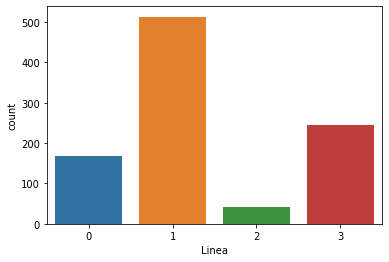

In [ ]:
ax = sns.countplot(x="Linea", data=dfJer)

### Limpieza del dataset

Después del análisi de Nans en Power Bi, decidimos eliminar todas las features que tengan más de un 10,5% de Nans, y luego se van a borrar las filas que queden con valores nulos.

In [ ]:
F = list(dfJer[dfJer['% Nan']<0.11]['Feature'])
print(F)
'3324' in F

['3315', '3318', '3321', '3324', '3327', '3330', '3333', '3336', '3339', '3342', '3345', '3348', '3351', '3354', '3357', '3360', '3367', '3370', '3373', '3376', '3379', '3382', '3385', '3388', '3395', '3398', '3401', '3404', '3407', '3412', '3421', '3424', '3427', '3430', '3433', '3436', '3439', '3442', '3449', '3452', '3455', '3458', '3461', '3464', '3467', '3470', '3473', '3476', '3479', '3482', '3485', '3488', '3491', '3494', '3499', '3504', '3509', '3514', '3519', '3524', '3529', '3534', '3539', '3544', '3549', '3554', '3559', '3724', '3729', '3734', '3739', '3744', '3749', '3754', '3759', '3764', '3769', '3774', '3779', '3784', '3789', '3794', '3799', '3804', '3809', '3814', '3819', '3824', '3829', '3855', '3857', '3859', '3861', '3863', '3865', '3867', '3869', '3871', '3873', '3876', '3878', '3880', '3882', '3944', '3946', '3948', '3950']


True

In [ ]:
dfNumOk = dfNum.copy()

for i in dfNum.columns:

  start = i.find('_F')+2
  ft = i[start:len(i)]

  if ft not in F and i not in ['Id', 'Response']:
    dfNumOk.drop(columns=[i], inplace=True)

dfNumOk

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,L3_S29_F3342,L3_S29_F3345,L3_S29_F3348,L3_S29_F3351,L3_S29_F3354,L3_S29_F3357,L3_S29_F3360,L3_S29_F3367,L3_S29_F3370,L3_S29_F3373,L3_S29_F3376,L3_S29_F3379,L3_S29_F3382,L3_S29_F3385,L3_S29_F3388,L3_S29_F3395,L3_S29_F3398,L3_S29_F3401,L3_S29_F3404,L3_S29_F3407,L3_S29_F3412,L3_S29_F3421,L3_S29_F3424,L3_S29_F3427,L3_S29_F3430,L3_S29_F3433,L3_S29_F3436,L3_S29_F3439,L3_S29_F3442,L3_S29_F3449,...,L3_S30_F3729,L3_S30_F3734,L3_S30_F3739,L3_S30_F3744,L3_S30_F3749,L3_S30_F3754,L3_S30_F3759,L3_S30_F3764,L3_S30_F3769,L3_S30_F3774,L3_S30_F3779,L3_S30_F3784,L3_S30_F3789,L3_S30_F3794,L3_S30_F3799,L3_S30_F3804,L3_S30_F3809,L3_S30_F3814,L3_S30_F3819,L3_S30_F3824,L3_S30_F3829,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3861,L3_S33_F3863,L3_S33_F3865,L3_S33_F3867,L3_S33_F3869,L3_S33_F3871,L3_S33_F3873,L3_S34_F3876,L3_S34_F3878,L3_S34_F3880,L3_S34_F3882,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,0.041,-0.072,-0.024,-0.026,-0.257,0.250,0.218,0.040,0.044,0.090,0.036,-0.117,0.054,-0.119,0.044,-0.024,0.218,-0.072,0.250,-0.702,-0.702,-0.047,-0.058,0.065,-0.069,-0.027,-0.058,0.030,-0.067,0.041,...,0.0,0.0,0.0,-0.177,-0.160,0.091,0.275,0.010,-0.007,0.038,0.013,0.019,0.013,-0.009,0.012,-0.010,-0.060,0.013,-0.027,0.013,0.005,-0.119,-0.102,-0.048,-0.119,-0.119,0.026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,-0.031,0.023,-0.010,0.113,0.238,-0.050,0.218,-0.174,-0.059,0.085,-0.015,-0.244,-0.050,-0.127,-0.006,-0.010,0.218,0.023,-0.050,0.082,0.082,-0.030,0.152,0.033,0.146,-0.022,0.152,-0.084,0.145,-0.031,...,0.0,0.0,0.0,-0.055,-0.143,-0.079,-0.004,0.012,-0.024,-0.036,0.013,-0.017,0.013,0.011,0.014,0.001,-0.041,0.013,-0.019,0.013,-0.049,-0.029,-0.026,-0.210,-0.029,-0.029,-0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,-0.005,-0.129,-0.138,0.101,0.238,-0.017,-0.115,0.070,0.064,-0.223,0.023,0.223,0.047,-0.099,0.006,-0.138,-0.115,-0.129,-0.017,0.104,0.104,-0.030,0.004,0.071,0.014,-0.022,0.004,0.049,0.014,-0.005,...,0.0,0.0,0.0,-0.155,-0.044,0.059,0.063,0.006,-0.026,0.119,0.013,0.055,0.013,0.081,0.017,0.134,0.115,0.013,0.051,0.013,-0.069,0.199,0.191,0.236,0.199,0.199,0.108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,0.020,-0.066,-0.038,0.078,-0.099,-0.017,0.218,-0.207,-0.033,0.137,0.030,-0.263,-0.024,-0.039,0.038,-0.038,0.218,-0.066,-0.017,0.063,0.063,-0.139,0.025,0.033,0.024,-0.059,0.025,-0.084,0.024,0.020,...,0.0,0.0,0.0,0.125,0.147,-0.173,-0.156,0.013,0.022,0.028,0.013,0.013,0.013,0.005,0.014,0.027,0.057,0.013,0.025,0.013,-0.014,0.017,0.031,0.165,0.017,0.017,0.035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,0.033,0.127,0.089,-0.167,-0.257,-0.050,0.218,-0.137,-0.111,-0.347,-0.149,0.099,-0.128,-0.091,-0.163,0.089,0.218,0.127,-0.050,0.101,0.101,-0.082,-0.063,0.015,-0.050,-0.039,-0.063,-0.147,-0.049,0.033,...,0.0,0.0,0.0,0.137,0.070,0.004,-0.129,0.010,0.022,0.056,0.013,0.025,0.013,-0.015,0.012,0.001,0.004,0.013,0.001,0.013,-0.056,-0.074,-0.049,0.147,-0.074,-0.074,-0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,200346,0.182,-0.030,0.072,0.012,-0.068,-0.064,0.006,-0.085,0.014,0.020,-0.046,0.077,0.066,0.069,-0.017,-0.115,0.012,-0.085,0.203,-0.002,-0.133,-0.076,0.072,0.006,0.077,-0.115,-0.046,-0.017,0.063,0.063,-0.030,-0.064,0.109,-0.069,-0.022,-0.063,0.18

In [ ]:
dfNumOk.dropna(inplace=True)
dfNumOk.describe()

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,L3_S29_F3342,L3_S29_F3345,L3_S29_F3348,L3_S29_F3351,L3_S29_F3354,L3_S29_F3357,L3_S29_F3360,L3_S29_F3367,L3_S29_F3370,L3_S29_F3373,L3_S29_F3376,L3_S29_F3379,L3_S29_F3382,L3_S29_F3385,L3_S29_F3388,L3_S29_F3395,L3_S29_F3398,L3_S29_F3401,L3_S29_F3404,L3_S29_F3407,L3_S29_F3412,L3_S29_F3421,L3_S29_F3424,L3_S29_F3427,L3_S29_F3430,L3_S29_F3433,L3_S29_F3436,L3_S29_F3439,L3_S29_F3442,L3_S29_F3449,...,L3_S30_F3729,L3_S30_F3734,L3_S30_F3739,L3_S30_F3744,L3_S30_F3749,L3_S30_F3754,L3_S30_F3759,L3_S30_F3764,L3_S30_F3769,L3_S30_F3774,L3_S30_F3779,L3_S30_F3784,L3_S30_F3789,L3_S30_F3794,L3_S30_F3799,L3_S30_F3804,L3_S30_F3809,L3_S30_F3814,L3_S30_F3819,L3_S30_F3824,L3_S30_F3829,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3861,L3_S33_F3863,L3_S33_F3865,L3_S33_F3867,L3_S33_F3869,L3_S33_F3871,L3_S33_F3873,L3_S34_F3876,L3_S34_F3878,L3_S34_F3880,L3_S34_F3882,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
count,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,...,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,8.893300e+04,88933.000000,88933.000000,88933.000000,8.893300e+04,88933.000000,88933.000000,88933.000000,8.893300e+04,88933.000000,88933.000000,88933.000000,88933.000000
mean,100070.258869,-0.001159,-0.000032,0.000408,-0.000924,0.002103,0.001610,-0.001010,-0.001252,-0.000988,-0.001460,0.000894,0.000388,-0.001639,0.001459,-0.008420,-0.000064,-0.000924,-0.001252,-0.000110,-0.000866,0.000220,-0.001378,0.000408,-0.001010,0.000388,-0.000064,0.000894,-0.008420,0.022839,0.022839,-0.000032,0.001610,0.000409,0.002145,-0.000527,0.001620,-0.001159,0.002103,-0.001460,...,0.000001,0.000056,0.000043,0.006512,0.004004,-0.002289,-0.002795,0.000599,0.001150,0.001341,0.000879,0.000902,0.000879,-0.000502,0.000618,0.000394,0.000430,0.000879,0.000447,0.000879,-0.000503,-0.000834,-0.001020,0.002221,-0.000834,-0.000834,0.000358,4.272880e-07,0.000055,0.000010,0.000024,3.598214e-07,0.000001,0.000005,0.000054,2.586217e-07,0.000008,0.000022,0.000032,0.004835
std,57845.392595,0.177554,0.124185,0.169695,0.162134,0.088837,0.076765,0.083163,0.084670,0.120020,0.116251,0.120580,0.122581,0.154683,0.155568,0.087967,0.159764,0.162134,0.084670,0.197985,0.081874,0.233345,0.083041,0.169695,0.083163,0.122581,0.159764,0.120580,0.087967,0.180968,0.180968,0.124185,0.076765,0.136389,0.090104,0.093221,0.076758,0.177554,0.088837,0.116251,...,0.000083,0.002111,0.002561,0.144545,0.149068,0.115863,0.110262,0.107443,0.062547,0.100518,0.109429,0.044288,0.109429,0.057201,0.108008,0.083964,0.090914,0.109429,0.039633,0.109429,0.070900,0.108370,0.095501,0.138008,0.108370,0.108370,0.096743,4.294041e-04,0.003623,0.000463,0.000843,5.922980e-05,0.000097,0.000298,0.002640,5.499742e-05,0.001425,0.000975,0.001723,0.069367
min,4.000000,-0.280000,-0.232000,-0.239000,-0.228000,-0.195000,-0.168000,-0.453000,-0.436000,-0.545000,-0.525000,-0.441000,-0.527000,-0.416000,-0.257000,-0.250000,-0.115000,-0.228000,-0.436000,-0.402000,-0.467000,-0.276000,-0.427000,-0.239000,-0.453000,-0.527000,-0.115000,-0.441000,-0.250000,-0.769000,-0.769000,-0.232000,-0.168000,-0.758000,-0.191000,-0.091000,-0.169000,-0.280000,-0.195000,-0.525

In [ ]:
print(list(dfNumOk.columns))

['Id', 'L3_S29_F3315', 'L3_S29_F3318', 'L3_S29_F3321', 'L3_S29_F3324', 'L3_S29_F3327', 'L3_S29_F3330', 'L3_S29_F3333', 'L3_S29_F3336', 'L3_S29_F3339', 'L3_S29_F3342', 'L3_S29_F3345', 'L3_S29_F3348', 'L3_S29_F3351', 'L3_S29_F3354', 'L3_S29_F3357', 'L3_S29_F3360', 'L3_S29_F3367', 'L3_S29_F3370', 'L3_S29_F3373', 'L3_S29_F3376', 'L3_S29_F3379', 'L3_S29_F3382', 'L3_S29_F3385', 'L3_S29_F3388', 'L3_S29_F3395', 'L3_S29_F3398', 'L3_S29_F3401', 'L3_S29_F3404', 'L3_S29_F3407', 'L3_S29_F3412', 'L3_S29_F3421', 'L3_S29_F3424', 'L3_S29_F3427', 'L3_S29_F3430', 'L3_S29_F3433', 'L3_S29_F3436', 'L3_S29_F3439', 'L3_S29_F3442', 'L3_S29_F3449', 'L3_S29_F3452', 'L3_S29_F3455', 'L3_S29_F3458', 'L3_S29_F3461', 'L3_S29_F3464', 'L3_S29_F3467', 'L3_S29_F3470', 'L3_S29_F3473', 'L3_S29_F3476', 'L3_S29_F3479', 'L3_S29_F3482', 'L3_S29_F3485', 'L3_S29_F3488', 'L3_S29_F3491', 'L3_S30_F3494', 'L3_S30_F3499', 'L3_S30_F3504', 'L3_S30_F3509', 'L3_S30_F3514', 'L3_S30_F3519', 'L3_S30_F3524', 'L3_S30_F3529', 'L3_S30_F3534', '

## Dataset Categórico

In [ ]:
drive.mount('/content/gdrive')

dfCat = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/bosch_category.csv', header=0, index_col=0)
dfCat.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,42,43,44,45,46,47,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,189,190,191,192,193,194,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,325,336,338,341,343,345,347,349,352,355,358,361,364,367,370,373,376,379,382,385,388,391,394,397,4

(100000, 2141)

In [ ]:
dfCat.describe()

,Id,L0_S3_F69,L0_S3_F71,L0_S3_F73,L0_S3_F75,L0_S3_F77,L0_S3_F79,L0_S3_F81,L0_S3_F83,L0_S3_F85,L0_S3_F87,L0_S3_F89,L0_S3_F91,L0_S3_F93,L0_S3_F95,L0_S3_F97,L0_S3_F99,L0_S3_F101,L0_S3_F103,L0_S6_F119,L0_S6_F121,L0_S6_F123,L0_S6_F125,L0_S6_F126,L0_S6_F128,L0_S6_F129,L0_S6_F131,L0_S6_F133,L0_S6_F135,L0_S11_F279,L0_S11_F281,L0_S11_F283,L0_S11_F285,L0_S11_F287,L0_S11_F289,L0_S11_F291,L0_S11_F293,L0_S11_F295,L0_S11_F297,L0_S11_F299,...,L3_S42_F4051,L3_S42_F4052,L3_S42_F4054,L3_S42_F4055,L3_S42_F4056,L3_S42_F4058,L3_S42_F4059,L3_S43_F4063,L3_S43_F4068,L3_S43_F4073,L3_S43_F4078,L3_S43_F4083,L3_S43_F4088,L3_S43_F4093,L3_S43_F4098,L3_S46_F4134,L3_S46_F4136,L3_S46_F4137,L3_S47_F4139,L3_S47_F4142,L3_S47_F4144,L3_S47_F4147,L3_S47_F4149,L3_S47_F4152,L3_S47_F4154,L3_S47_F4157,L3_S47_F4159,L3_S47_F4162,L3_S47_F4164,L3_S47_F4167,L3_S47_F4169,L3_S47_F4172,L3_S47_F4174,L3_S47_F4177,L3_S47_F4179,L3_S47_F4182,L3_S47_F4184,L3_S47_F4187,L3_S47_F4189,L3_S47_F4192
count,100000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,100116.599650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57830.694607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50104.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,100148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,150115.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,200352.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(dfCat.isna().sum()/100000).sort_values(ascending=True)

Id              0.00000
L3_S29_F3411    0.33743
L3_S29_F3409    0.33743
L3_S29_F3406    0.33743
L3_S29_F3403    0.33743
                 ...   
L1_S24_F1047    1.00000
L1_S25_F2595    1.00000
L1_S25_F2593    1.00000
L1_S25_F2602    1.00000
L1_S25_F2902    1.00000
Length: 2141, dtype: float64

## Dataset Temporal

In [ ]:
drive.mount('/content/gdrive')

dfTem = pd.read_csv('/content/gdrive/My Drive/Dataset Bosch/bosch_date.csv', header=0, index_col=0)
dfTem.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(100000, 1157)

In [ ]:
dfTem.describe()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
count,100000.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57915.000000,57930.000000,57930.000000,29161.000000,29161.000000,29161.000000,29161.000000,29161.000000,29161.000000,29161.000000,29161.000000,29161.000000,28813.000000,28813.000000,28813.000000,28813.000000,28813.000000,28813.000000,28813.000000,28813.000000,28813.000000,28880.000000,28876.000000,29120.000000,29120.000000,29215.000000,29215.000000,29215.000000,...,5202.000000,5202.000000,0.0,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,2542.000000,2542.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000
mean,100116.599650,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.064145,873.024035,873.024035,873.622752,873.622752,873.622752,873.622752,873.622752,873.622752,873.622752,873.622752,873.622752,872.376614,872.376614,872.376614,872.376614,872.376614,872.376614,872.376614,872.376614,872.376614,878.838766,878.836844,867.385335,867.385335,873.211698,873.211698,873.211698,...,1030.292768,1030.292768,NaN,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.306125,1030.315146,1030.315146,1030.315146,1030.315146,1030.315146,1030.315146,1030.315146,1027.026845,1027.026845,1027.176827,1027.176827,1027.176827,1027.176827,1027.176827,1033.010514,1033.010514,1033.010514,1033.010514,1033.010514,1033.010514,1033.010514,1031.179061,1031.179061,1031.179061,1031.179061,1031.179061
std,57830.694607,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.779468,501.732581,501.732581,502.102532,502.102532,502.102532,502.102532,502.102532,502.102532,502.102532,502.102532,502.102532,501.412309,501.412309,501.412309,501.412309,501.412309,501.412309,501.412309,501.412309,501.412309,499.421552,499.443322,503.985934,503.985934,500.431686,500.431686,500.431686,...,429.246515,429.246515,NaN,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.226226,429.225738,429.225738,429.225738,429.225738,429.225738,429.225738,429.225738,431.736808,431.736808,431.718135,431.718135,431.718135,431.718135,431.718135,426.893573,426.893573,426.893573,426.893573,426.893573,426.893573,426.893573,428.800237,428.800237,428.800237,428.800237,428.800237
min,4.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.290000,0.290000,0.290000,0.290000,0.290000,0.29

In [ ]:
(dfTem.isna().sum()/100000).sort_values(ascending=True)

Id              0.00000
L3_S37_D3947    0.05526
L3_S37_D3945    0.05526
L3_S37_D3943    0.05526
L3_S37_D3942    0.05526
                 ...   
L3_S42_D4057    1.00000
L3_S42_D4053    1.00000
L3_S42_D4049    1.00000
L3_S42_D4045    1.00000
L1_S24_D1158    1.00000
Length: 1157, dtype: float64

# Aplicación de ML

In [ ]:
dfNumOk['Response'].value_counts()

0    88503
1      430
Name: Response, dtype: int64

In [ ]:
from sklearn.utils import resample

df_majority = dfNumOk[dfNumOk.Response==1]
df_minority = dfNumOk[dfNumOk.Response==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=430,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dfNumUp = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
dfNumUp.Response.value_counts()

1    430
0    430
Name: Response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

target = dfNumUp['Response'].values
features = ['L3_S29_F3315', 'L3_S29_F3318', 'L3_S29_F3321', 'L3_S29_F3324', 'L3_S29_F3327', 'L3_S29_F3330', 'L3_S29_F3333', 'L3_S29_F3336', 'L3_S29_F3339', 'L3_S29_F3342', 'L3_S29_F3345', 'L3_S29_F3348', 'L3_S29_F3351', 'L3_S29_F3354', 'L3_S29_F3357', 'L3_S29_F3360', 'L3_S29_F3367', 'L3_S29_F3370', 'L3_S29_F3373', 'L3_S29_F3376', 'L3_S29_F3379', 'L3_S29_F3382', 'L3_S29_F3385', 'L3_S29_F3388', 'L3_S29_F3395', 'L3_S29_F3398', 'L3_S29_F3401', 'L3_S29_F3404', 'L3_S29_F3407', 'L3_S29_F3412', 'L3_S29_F3421', 'L3_S29_F3424', 'L3_S29_F3427', 'L3_S29_F3430', 'L3_S29_F3433', 'L3_S29_F3436', 'L3_S29_F3439', 'L3_S29_F3442', 'L3_S29_F3449', 'L3_S29_F3452', 'L3_S29_F3455', 'L3_S29_F3458', 'L3_S29_F3461', 'L3_S29_F3464', 'L3_S29_F3467', 'L3_S29_F3470', 'L3_S29_F3473', 'L3_S29_F3476', 'L3_S29_F3479', 'L3_S29_F3482', 'L3_S29_F3485', 'L3_S29_F3488', 'L3_S29_F3491', 'L3_S30_F3494', 'L3_S30_F3499', 'L3_S30_F3504', 'L3_S30_F3509', 'L3_S30_F3514', 'L3_S30_F3519', 'L3_S30_F3524', 'L3_S30_F3529', 'L3_S30_F3534', 'L3_S30_F3539', 'L3_S30_F3544', 'L3_S30_F3549', 'L3_S30_F3554', 'L3_S30_F3559', 'L3_S30_F3724', 'L3_S30_F3729', 'L3_S30_F3734', 'L3_S30_F3739', 'L3_S30_F3744', 'L3_S30_F3749', 'L3_S30_F3754', 'L3_S30_F3759', 'L3_S30_F3764', 'L3_S30_F3769', 'L3_S30_F3774', 'L3_S30_F3779', 'L3_S30_F3784', 'L3_S30_F3789', 'L3_S30_F3794', 'L3_S30_F3799', 'L3_S30_F3804', 'L3_S30_F3809', 'L3_S30_F3814', 'L3_S30_F3819', 'L3_S30_F3824', 'L3_S30_F3829', 'L3_S33_F3855', 'L3_S33_F3857', 'L3_S33_F3859', 'L3_S33_F3861', 'L3_S33_F3863', 'L3_S33_F3865', 'L3_S33_F3867', 'L3_S33_F3869', 'L3_S33_F3871', 'L3_S33_F3873', 'L3_S34_F3876', 'L3_S34_F3878', 'L3_S34_F3880', 'L3_S34_F3882', 'L3_S37_F3944', 'L3_S37_F3946', 'L3_S37_F3948', 'L3_S37_F3950']

x_train, x_test, y_train, y_test = train_test_split(dfNumUp[features], target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(max_depth = 50, min_samples_split = 3, n_estimators = 20 , random_state = 42)
RFC.fit(x_train, y_train) 
train_prediction = RFC.predict(x_train)
test_prediction = RFC.predict(x_test)
print("Train accuracy {}.".format(accuracy_score(y_train,train_prediction)))
print("Test accuracy {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_train, train_prediction))

Train accuracy 0.998546511627907.
Test accuracy 0.6104651162790697.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       346

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = None, max_leaf_nodes=10), 
                            algorithm = 'SAMME',n_estimators=10, learning_rate=0.5)
ADA.fit(x_train,y_train)
train_prediction = ADA.predict(x_train)
test_prediction = ADA.predict(x_test)
print("Train accuracy {}.".format(accuracy_score(y_train,train_prediction)))
print("Test accuracy {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_train, train_prediction))

Train accuracy 0.8168604651162791.
Test accuracy 0.6453488372093024.
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       342
           1       0.85      0.77      0.81       346

    accuracy                           0.82       688
   macro avg       0.82      0.82      0.82       688
weighted avg       0.82      0.82      0.82       688

